In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import glob

# Set Seaborn style and color palette
sns.set_theme(style="whitegrid")  # Adds grid with a clean background
sns.color_palette("muted")  # Use a muted color palette for better aesthetics

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [2]:
xls = pd.ExcelFile('../Data/evolution.xlsx')
df_artEvo = pd.read_excel(xls, 'artifact-evo')
df_relEvo = pd.read_excel(xls, 'release-evo')

In [3]:
df_artEvo

,year,month,artifactCount
0,2002,5,2
1,2002,7,1
2,2003,3,1
3,2003,6,1
4,2003,10,1
...,...,...,...
238,2024,4,71202
239,2024,5,78490
240,2024,6,77352
241,2024,7,71465


In [4]:
df_relEvo

,year,month,releaseCount
0,2002,5,2
1,2002,7,1
2,2003,3,1
3,2003,6,1
4,2003,10,1
...,...,...,...
238,2024,4,221439
239,2024,5,236466
240,2024,6,222219
241,2024,7,209291


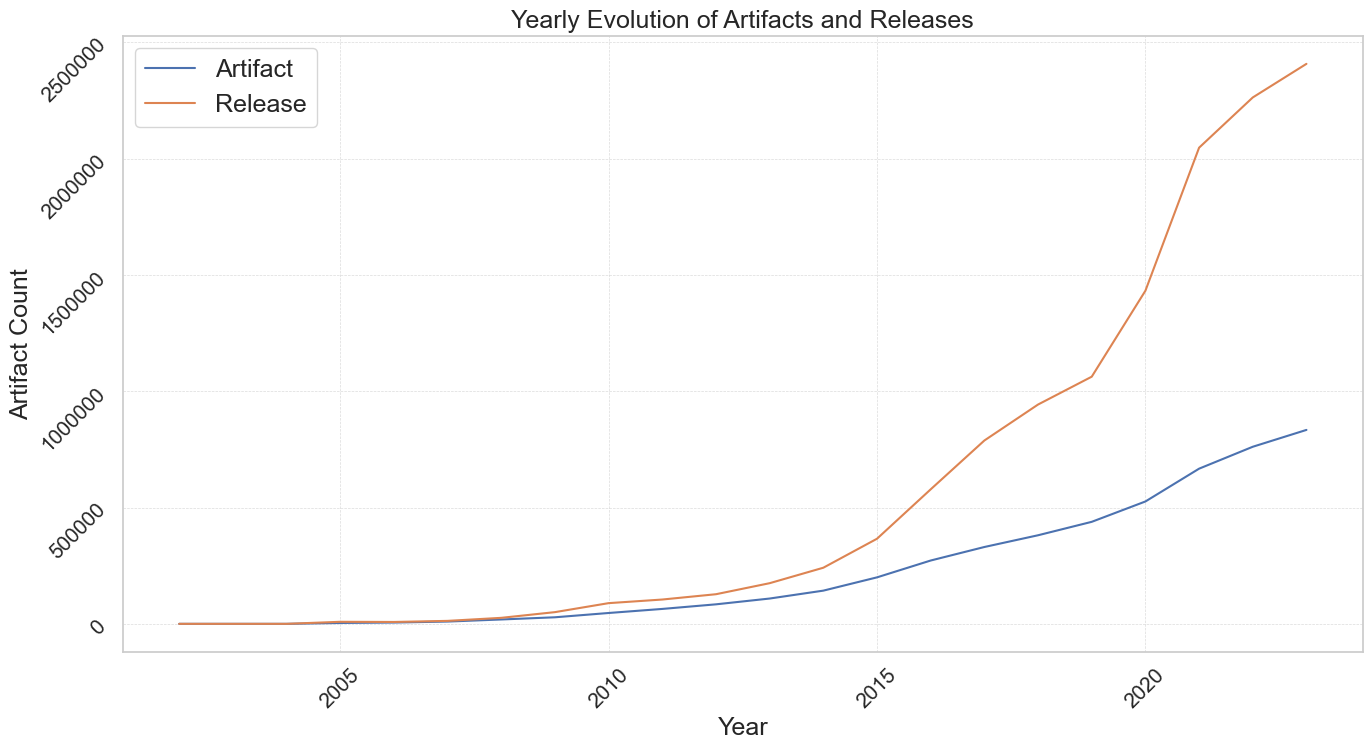

In [9]:
# Aggregate the data by year
yearly_df_art = df_artEvo.groupby('year', as_index=False)['artifactCount'].sum()
yearly_df_rel = df_relEvo.groupby('year', as_index=False)['releaseCount'].sum()

# Plot the data
fig = plt.figure(figsize=(16, 8))
plt.xticks(rotation=45, fontsize=15)
plt.yticks(rotation=45, fontsize=15)
# plt.tight_layout()
# plt.yscale('log')

# Set x-axis ticks to show all years
# years = sorted(set(yearly_df_art['year']).union(yearly_df_rel['year']))
# plt.xticks(ticks=years)
formatter = ticker.StrMethodFormatter("{x:.0f}")
plt.gca().yaxis.set_major_formatter(formatter)

# Gridlines
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

sns.lineplot(x='year', y='artifactCount', data=yearly_df_art[:-1], label='Artifact')
sns.lineplot(x='year', y='releaseCount', data=yearly_df_rel[:-1], label='Release')
plt.title('Yearly Evolution of Artifacts and Releases', fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Artifact Count', fontsize=18)
plt.legend(fontsize=18, title_fontsize=18)
plt.show()
# fig.savefig('f2.png', dpi=fig.dpi)